In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import openpyxl as xl

# Duplicates

## loading duplicates

In [2]:
dups = pd.read_excel("matlab_XLR.xlsx", sheet_name="Duplicates")
dups.head()

,ALS ID,Reference,Client Sample ID,QC Type,QC Lot,Analyte,Matrix,Method,Sample Result,Duplicate Result,Detection Limit,Units,RPD(%)\nor Diff.,Duplicate Limits,Qual,Eval
0,QC-MRG4-966302005,VA23B0556-001,White Sturgeon (WS #1) MT,DUP,966302,Aluminum,Biota,E440,10.0,7.8,2.00,mg/kg,2.2,Diff <2x LOR,NaN,ü
1,QC-MRG4-966302005,VA23B0556-001,White Sturgeon (WS #1) MT,DUP,966302,Antimony,Biota,E440,<0.010,<0.010,0.01,mg/kg,0,Diff <2x LOR,NaN,ü
2,QC-MRG4-966302005,VA23B0556-001,White Sturgeon (WS #1) MT,DUP,966302,Arsenic,Biota,E440,0.806,0.869,0.02,mg/kg,7.51%,40,NaN,ü
3,QC-MRG4-966302005,VA23B0556-001,White Sturgeon (WS #1) MT,DUP,966302,Barium,Biota,E440,2.47,2.94,0.05,mg/kg,17.4%,40,NaN,ü
4,QC-MRG4-966302005,VA23B0556-001,White Sturgeon (WS #1) MT,DUP,966302,Beryllium,Biota,E440,<0.010,<0.010,0.01,mg/kg,0,Diff <2x LOR,NaN,ü


In [3]:
dups['Sample Result'] = dups['Sample Result'].str.removeprefix('<')
dups['Duplicate Result'] = dups['Duplicate Result'].str.removeprefix('<')
dups.head()

,ALS ID,Reference,Client Sample ID,QC Type,QC Lot,Analyte,Matrix,Method,Sample Result,Duplicate Result,Detection Limit,Units,RPD(%)\nor Diff.,Duplicate Limits,Qual,Eval
0,QC-MRG4-966302005,VA23B0556-001,White Sturgeon (WS #1) MT,DUP,966302,Aluminum,Biota,E440,10.0,7.8,2.00,mg/kg,2.2,Diff <2x LOR,NaN,ü
1,QC-MRG4-966302005,VA23B0556-001,White Sturgeon (WS #1) MT,DUP,966302,Antimony,Biota,E440,0.010,0.010,0.01,mg/kg,0,Diff <2x LOR,NaN,ü
2,QC-MRG4-966302005,VA23B0556-001,White Sturgeon (WS #1) MT,DUP,966302,Arsenic,Biota,E440,0.806,0.869,0.02,mg/kg,7.51%,40,NaN,ü
3,QC-MRG4-966302005,VA23B0556-001,White Sturgeon (WS #1) MT,DUP,966302,Barium,Biota,E440,2.47,2.94,0.05,mg/kg,17.4%,40,NaN,ü
4,QC-MRG4-966302005,VA23B0556-001,White Sturgeon (WS #1) MT,DUP,966302,Beryllium,Biota,E440,0.010,0.010,0.01,mg/kg,0,Diff <2x LOR,NaN,ü


calculating range, mean, error

In [4]:
range = np.abs(dups['Sample Result'].to_numpy('float') - dups['Duplicate Result'].to_numpy('float'))
mean = np.mean(np.c_[dups['Sample Result'].to_numpy('float'), dups['Duplicate Result'].to_numpy('float')], axis=1)
error = range / mean * 100

creating new tables

In [5]:
nt = pd.DataFrame({'range': range, 'mean': mean, 'error (%)': error})

In [6]:
dups = pd.concat([dups, nt], axis=1)

# liver - muscle plot

## loading data

In [7]:
data = pd.read_excel("matlab_XLR.xlsx", sheet_name="Results Summary")
vn = data.columns
lt_track = np.zeros(data.shape, dtype = "bool")
for i in np.arange(3, len(vn)):
    lt_track[:, i] = ~(data[vn[i]].str.removeprefix("<") == data[vn[i]])
    temp = data[vn[i]].str.removeprefix("<")
    data[vn[i]] = temp
    
data.head()


,Analyte,Lowest\nDetection Limit,Units,White Sturgeon (WS #1) MT,White Sturgeon (WS #2) MT,White Sturgeon (WS #3) MT,White Sturgeon (WS #4) MT,White Sturgeon (WS #5) MT,White Sturgeon (WS #7) MT,White Sturgeon (WS #10) MT,White Sturgeon (WS #11) MT,White Sturgeon (WS #13) MT,White Sturgeon (WS #1) Liver,White Sturgeon (WS #2) Liver,White Sturgeon (WS #4) Liver,White Sturgeon (WS #5) Liver,White Sturgeon (WS #7) Liver,White Sturgeon (WS #10) Liver,White Sturgeon (WS #11) Liver,White Sturgeon (WS #13) Liver
0,Moisture,0.500,%,73.0,70.7,66.0,72.8,74.9,72.9,77.5,72.7,77.7,58.2,50.1,69.8,62.5,57.2,55.6,63.3,75.4
1,Aluminum,2.000,mg/kg,10.0,18.0,2.0,37.0,2.0,2.8,2.4,2.5,4.4,7.2,3.7,9.7,3.8,9.4,9.8,7.9,26.4
2,Aluminum,0.400,mg/kg wwt,2.71,5.28,0.42,10.1,0.49,0.77,0.54,0.69,0.98,3.03,1.86,2.94,1.42,4.03,4.33,2.89,6.52
3,Antimony,0.010,mg/kg,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.023
4,Antimony,0.002,mg/kg wwt,0.0020,0.0022,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0021,0.0029,0.0024,0.0020,0.0037,0.0057


# Ploting mentioned elements

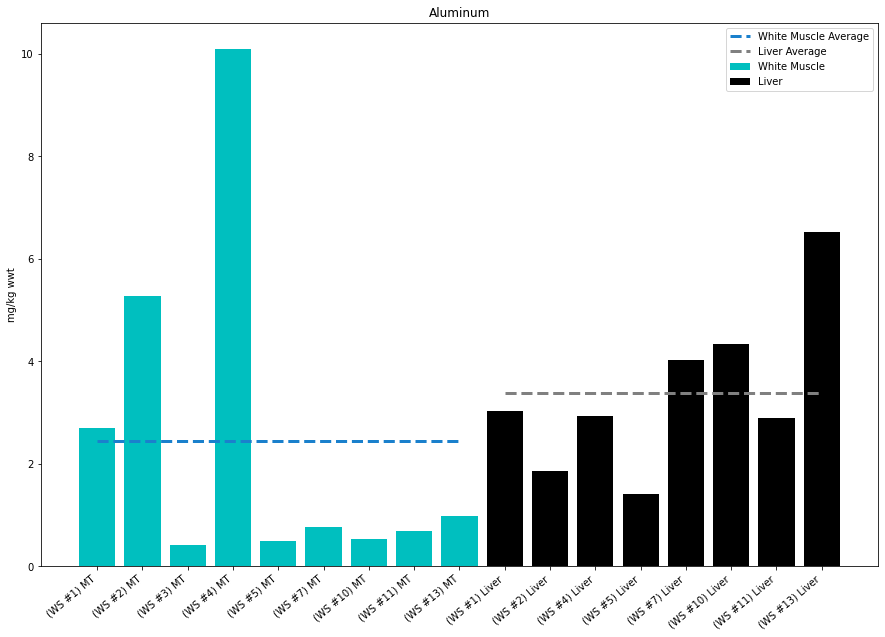

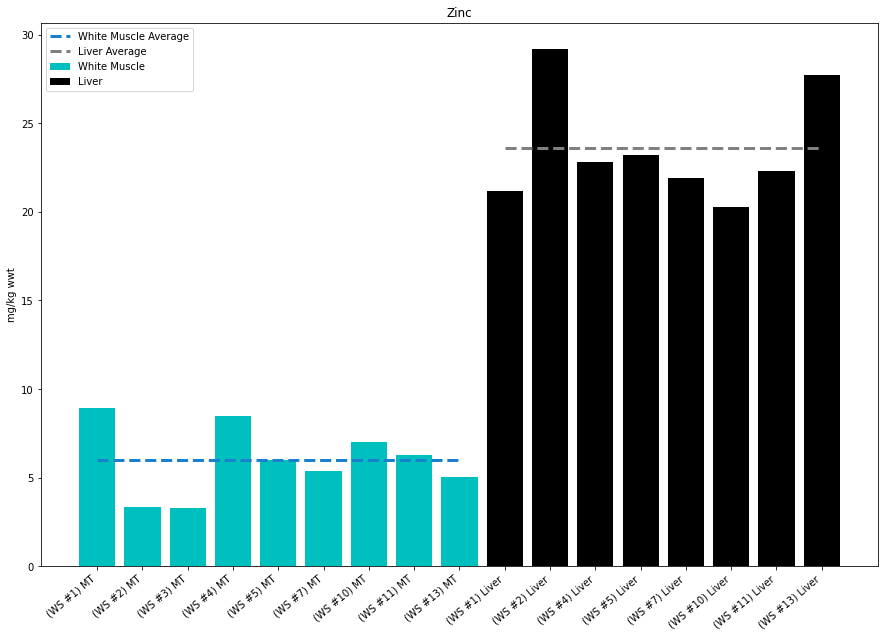

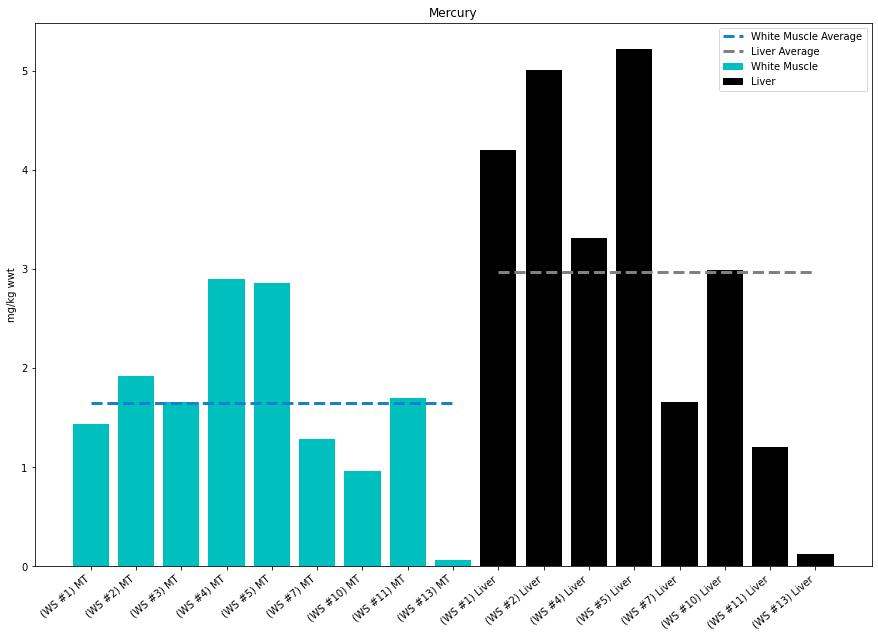

In [8]:
elements = ["Aluminum", "Zinc", "Mercury"]
## to plot all elements uncomment bellow
# elements = data["Analyte"][1::2].to_list()

# to save the picture of an element figure, set the corrosponding value to True
# save_pic = [False, False, True]

## to save all uncomment below
save_pic = np.ones(len(elements), dtype="bool")


x = data.columns[3:]
# seperating liver and mt using columns contatins the word "Li`ver"
Liver_id = x.str.contains("Liver")

for i in np.arange(len(elements)):
    # creating figure
    fig, ax = plt.subplots(figsize=(15, 10))
    fig.set_facecolor("White")
    # obtaining related data
    values = np.array(data[np.logical_and(data["Analyte"] == elements[i], data["Units"] == "mg/kg wwt")].to_numpy()[:, 3:].ravel(), dtype=float)
    # bar ploting mt
    ax.bar(x[~Liver_id], values[~Liver_id], color = "c", label="White Muscle")
    # bar ploting liver
    ax.bar(x[Liver_id], values[Liver_id], color = "k", label="Liver")
    # ploting mean of mt
    ax.plot(x[~Liver_id], np.mean(values[~Liver_id]) * np.ones(x[~Liver_id].shape), color = [0.1, 0.5, 0.8], label = "White Muscle Average", linestyle = "dashed", linewidth = 3)
    # ploting mean of liver
    ax.plot(x[Liver_id], np.mean(values[Liver_id]) * np.ones(x[Liver_id].shape), color = "gray", label = "Liver Average", linestyle = "dashed", linewidth = 3)
    # setting axis side names
    ax.set_xlabel("")
    ax.set_ylabel("mg/kg wwt")
    ax.set_title(elements[i])
    # setting xticks and xtick labels
    ax.xaxis.set_ticks(np.arange(data.shape[1]-3))
    ax.xaxis.set_ticklabels(data.columns[3:].str.removeprefix("White Sturgeon "), rotation = 40, ha = "right")
    # enabling legend
    ax.legend()
    if not os.path.exists("./pics/"):
        os.makedirs("./pics/")
    if save_pic[i] == True:
        fig.savefig("./pics/"+elements[i]+".png")

# Statistics

In [9]:
from scipy.stats import shapiro

## Shapiro test

In [10]:
shapiro_dict = {}
# elements = ["Aluminum", "Zinc", "Mercury"]
elements = data["Analyte"][1::2].to_list()
for element in elements:
    result_liver = shapiro(data.loc[np.logical_and(data["Analyte"] == element, data["Units"] == "mg/kg wwt")].iloc[:, 3:].to_numpy("double")[:, Liver_id])
    result_mt = shapiro(data.loc[np.logical_and(data["Analyte"] == element, data["Units"] == "mg/kg wwt")].iloc[:, 3:].to_numpy("double")[:, ~Liver_id])
    shapiro_dict.update({element: [*result_liver, *result_mt]})

/Users/amir/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [11]:
shapiro_table = pd.DataFrame(np.c_[np.array(list(shapiro_dict.keys()), dtype="str"), np.array(list(shapiro_dict.values()))], columns=["analyte", "liver statistic", "liver p-value", "mt statistics", "mt p-value"])

## pearson correlation factor

In [12]:
## extracting matching columns
liver_temp = x[Liver_id].str.removesuffix(" Liver")
mt_temp = x[~Liver_id].str.removesuffix(" MT")
test_columns = []
for cl in liver_temp:
    if cl in mt_temp:
        test_columns.append(cl)

liver_columns = [x+" Liver" for x in test_columns]
mt_columns = [x+" MT" for x in test_columns]

In [13]:
from scipy.stats import pearsonr

In [14]:
pearson_dict = {}
# elements = ["Aluminum", "Zinc", "Mercury"]
elements = data["Analyte"][1::2].to_list()
for element in elements:
    result = pearsonr(data.loc[np.logical_and(data["Analyte"] == element, data["Units"] == "mg/kg wwt"), liver_columns].to_numpy("double").ravel(), data.loc[np.logical_and(data["Analyte"] == element, data["Units"] == "mg/kg wwt"), mt_columns].to_numpy("double").ravel())
    pearson_dict.update({element: [*result]})

/Users/amir/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/amir/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/amir/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/amir/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/amir/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: Con

In [15]:
pearson_dict
pearson_liver_mt_table = pd.DataFrame(np.c_[np.array(list(pearson_dict.keys()), dtype="str")[:, np.newaxis], data.loc[data["Units"] == "mg/kg wwt", [*liver_columns, *mt_columns]].to_numpy("single"), np.array(list(pearson_dict.values()))], columns=["analyte", *[*liver_columns, *mt_columns], "statistic", "p-value"])

## pearson element by element correlation check

### Overall

In [16]:
lt_id = lt_track[:, 3:]
row_id = np.logical_and(data["Units"].to_numpy() == "mg/kg wwt", ~np.all(lt_id == True, axis = 1))
corr_matrix = np.corrcoef(data.loc[row_id, x].to_numpy("single").T, rowvar=False).round(decimals = 2)
elements = data["Analyte"].loc[row_id].to_numpy()

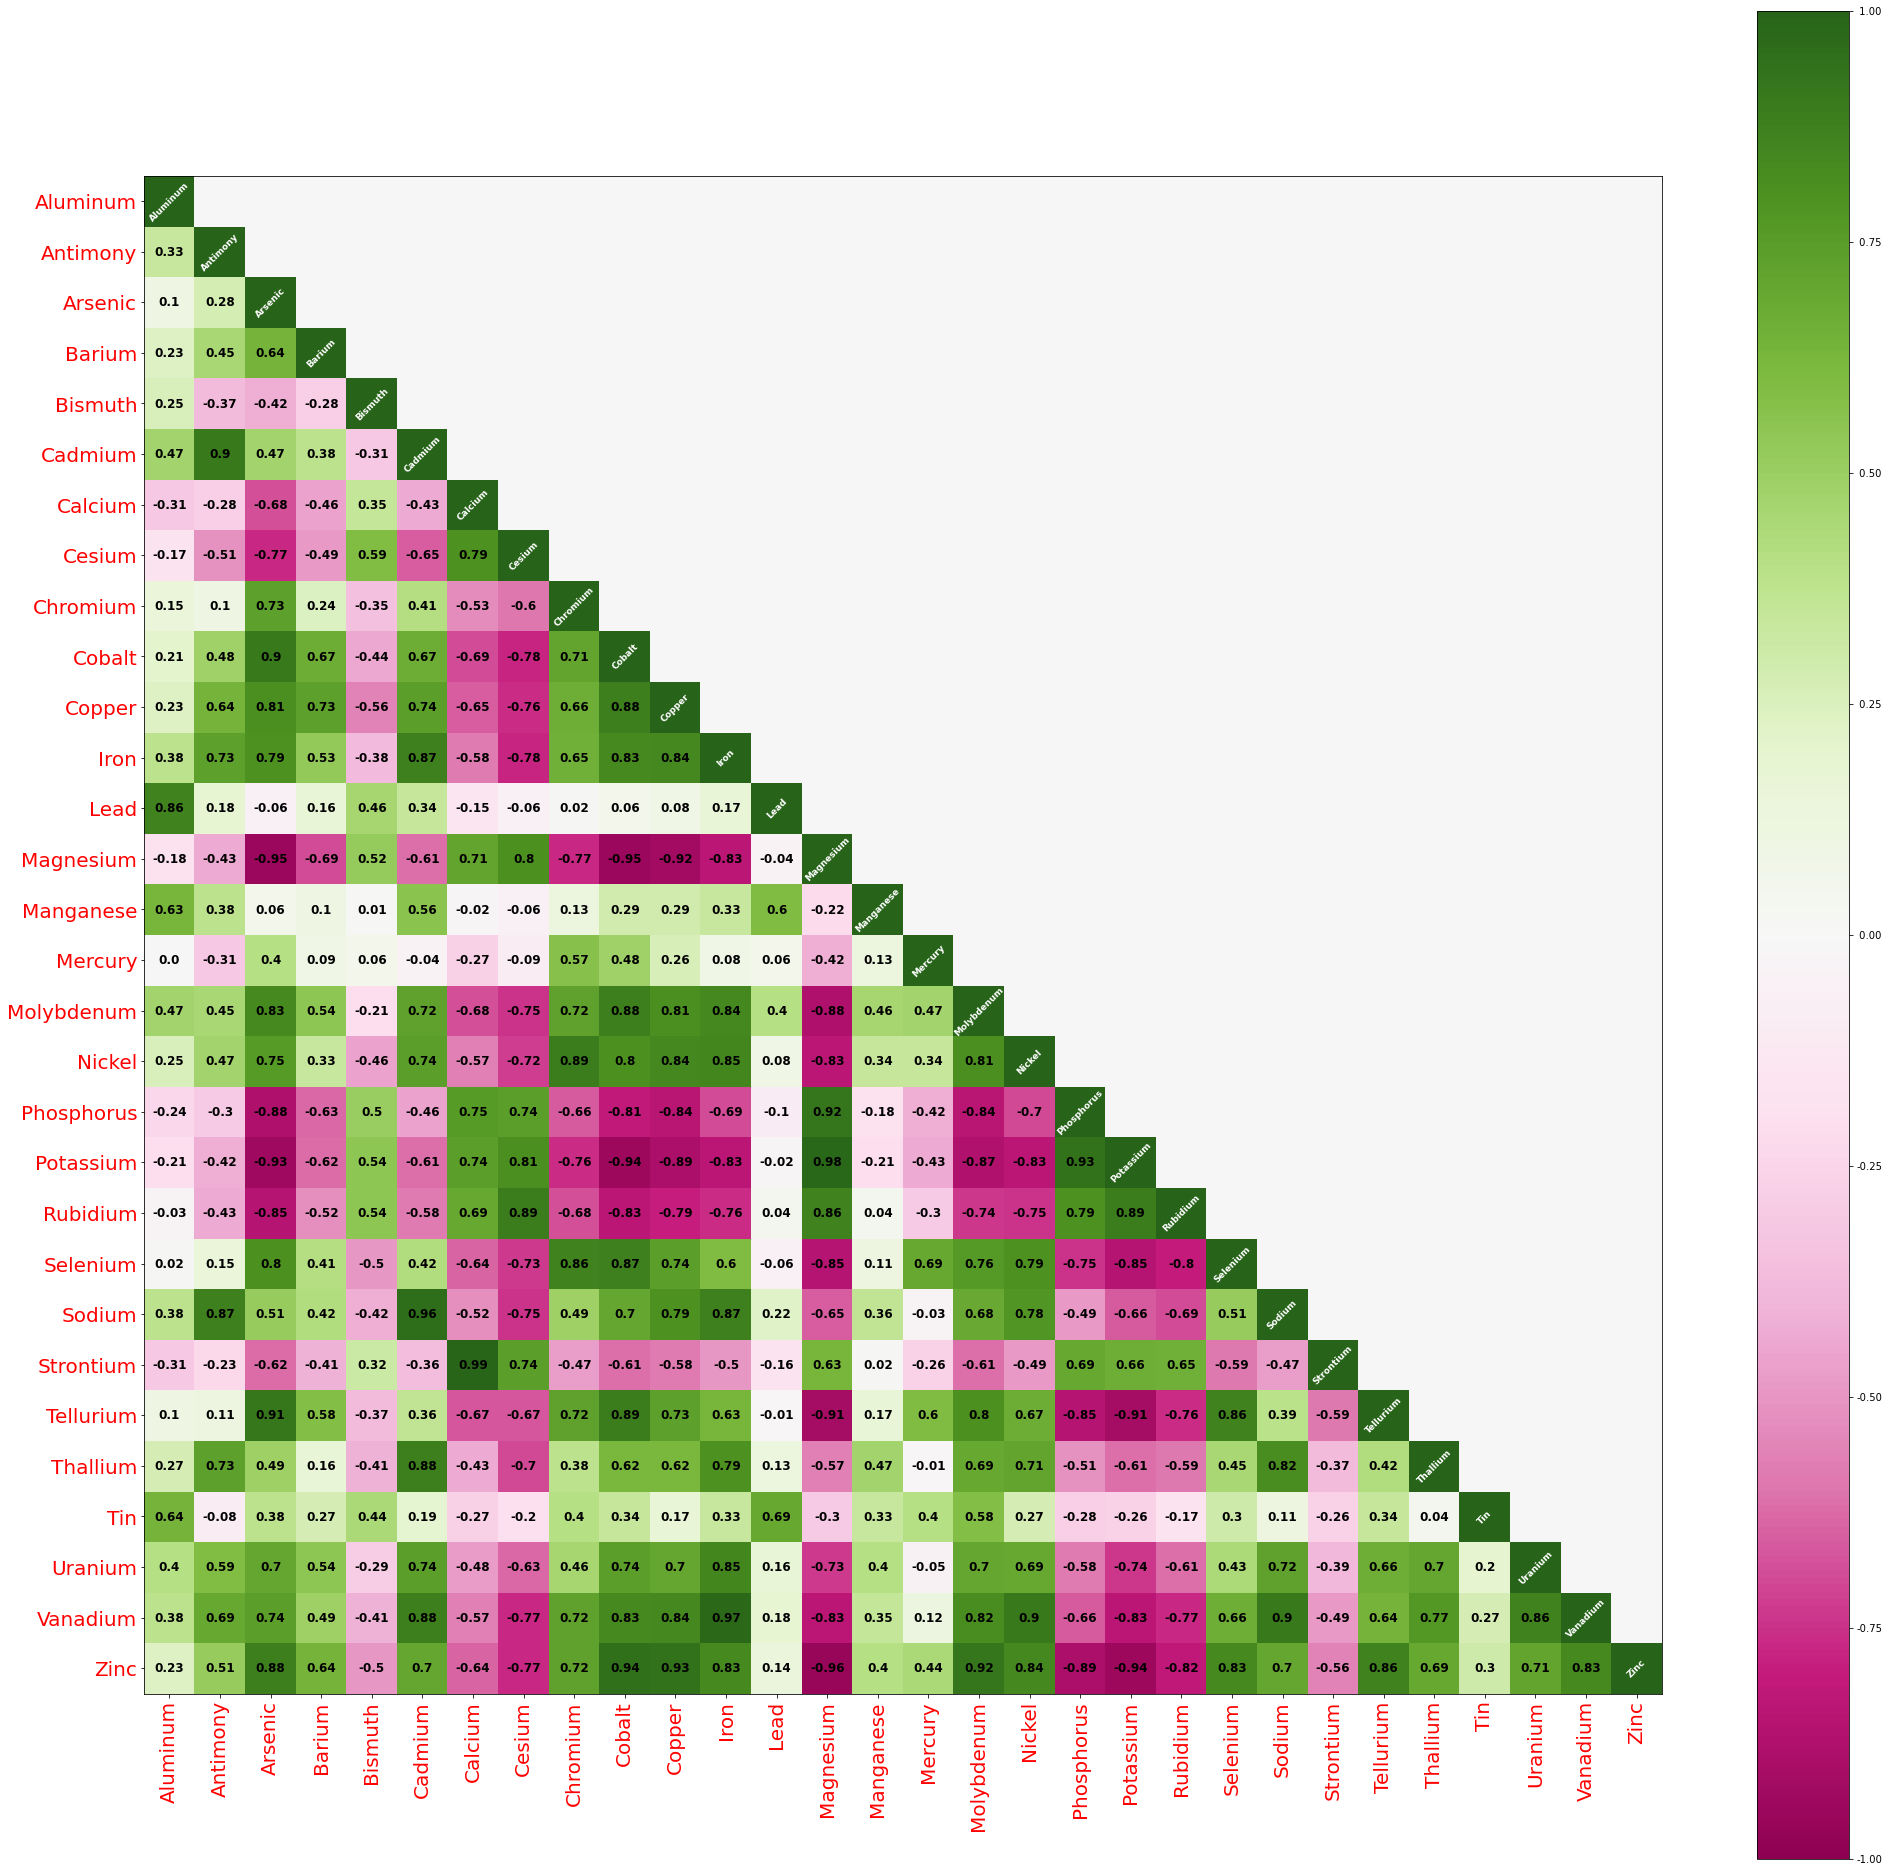

In [17]:
fig, ax = plt.subplots(figsize = (34, 34))
cmap = plt.cm.PiYG
im = ax.imshow(np.tril(corr_matrix, k=0), cmap=cmap)
fig.set_facecolor("white")
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set_ticks(np.arange(corr_matrix.shape[0]), elements, rotation = 90, color = "r", fontsize = 20)
ax.yaxis.set_ticks(np.arange(corr_matrix.shape[0]), elements, color = "r", fontsize = 20)
# ax.set_ylim(2.5, -0.5)
for i in np.arange(corr_matrix.shape[0]):
    ax.text(i, i, elements[i], ha = 'center', va = 'center',
            color = 'white', fontsize = 9, rotation = 45, fontweight = "bold")
    for j in np.arange(i):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='k', fontsize = 12, fontweight = "bold")
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
cbar.ax.tick_params(labelsize=20)
plt.savefig("./pics/pearson.png")
plt.show()


### just liver

In [18]:
lt_id = lt_track[:, 3:]
row_id = np.logical_and(data["Units"].to_numpy() == "mg/kg wwt", ~np.all(lt_id[:, Liver_id] == True, axis = 1))
corr_matrix_liver = np.corrcoef(data.loc[row_id, x[Liver_id]].to_numpy("single").T, rowvar=False).round(decimals = 2)
elements = data["Analyte"].loc[row_id].to_numpy()

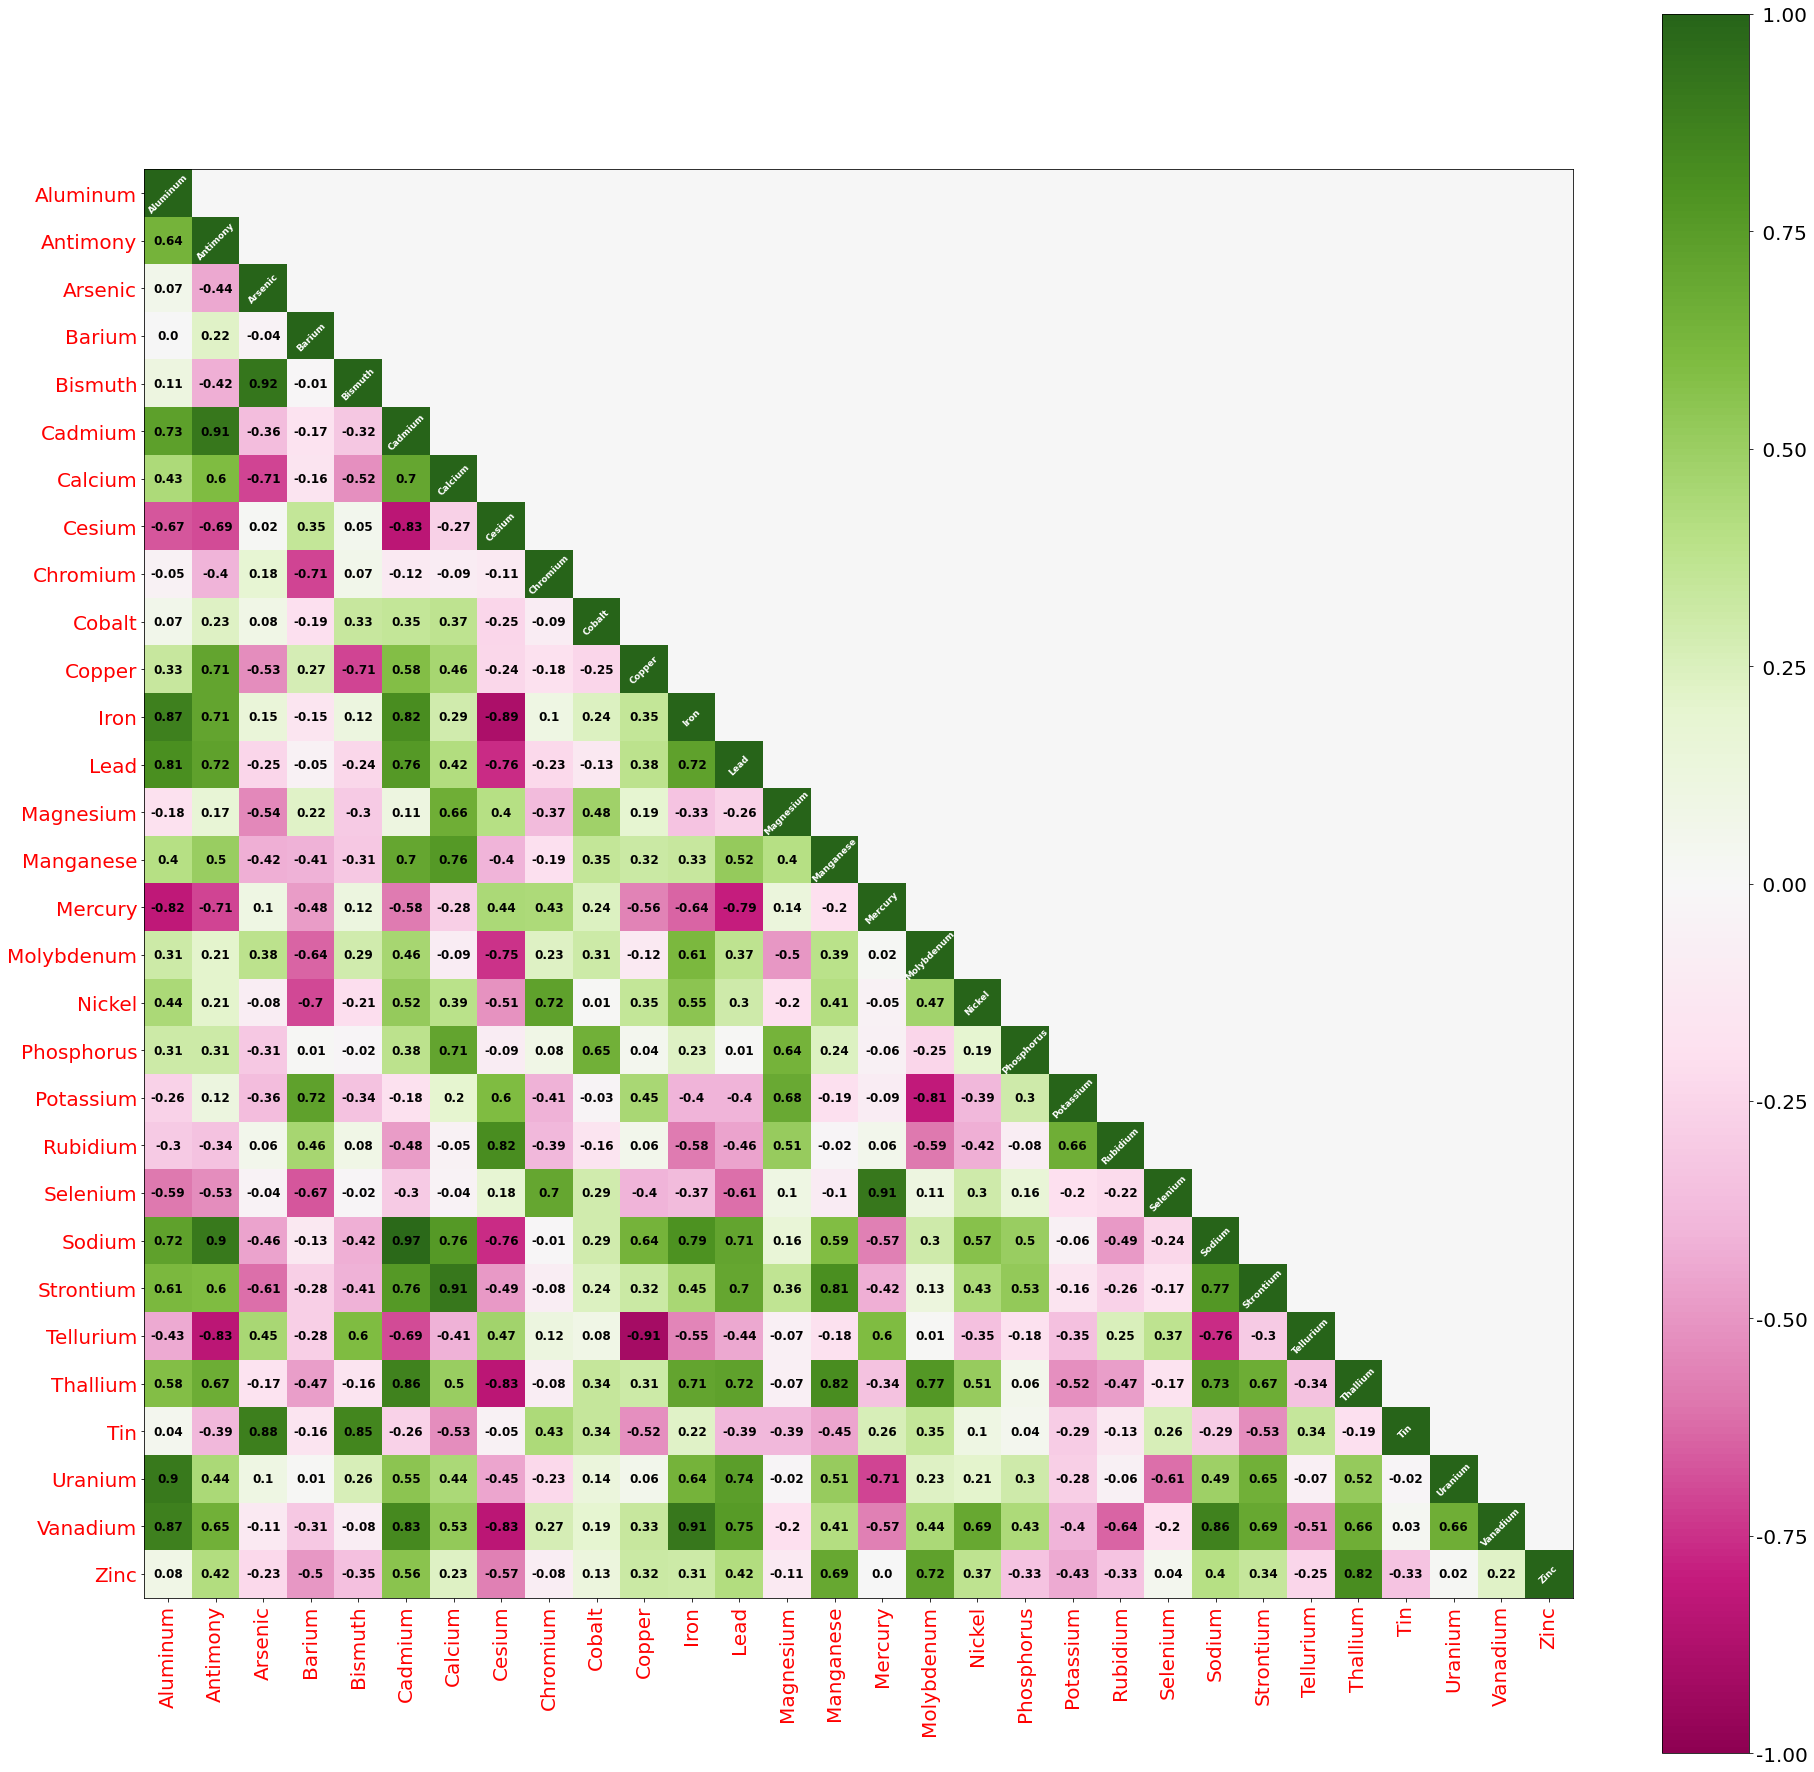

In [19]:
fig, ax = plt.subplots(figsize = (32, 32))
cmap = plt.cm.PiYG
im = ax.imshow(np.tril(corr_matrix_liver, k=0), cmap=cmap)
fig.set_facecolor("white")
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set_ticks(np.arange(corr_matrix_liver.shape[0]), elements, rotation = 90, color = "r", fontsize = 20)
ax.yaxis.set_ticks(np.arange(corr_matrix_liver.shape[0]), elements, color = "r", fontsize = 20)
# ax.set_ylim(2.5, -0.5)
for i in np.arange(corr_matrix_liver.shape[0]):
    ax.text(i, i, elements[i], ha = 'center', va = 'center',
            color = 'white', fontsize = 9, rotation = 45, fontweight = "bold")
    for j in np.arange(i):
        ax.text(j, i, corr_matrix_liver[i, j], ha='center', va='center',
                color='k', fontsize = 12, fontweight = "bold")
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
cbar.ax.tick_params(labelsize=20)
plt.savefig("./pics/pearson liver.png")
plt.show()


### Just MT

In [20]:
lt_id = lt_track[:, 3:]
row_id = np.logical_and(data["Units"].to_numpy() == "mg/kg wwt", ~np.all(lt_id[:, ~Liver_id] == True, axis = 1))
corr_matrix_MT = np.corrcoef(data.loc[row_id, x[~Liver_id]].to_numpy("single").T, rowvar=False).round(decimals = 2)
elements = data["Analyte"].loc[row_id].to_numpy()

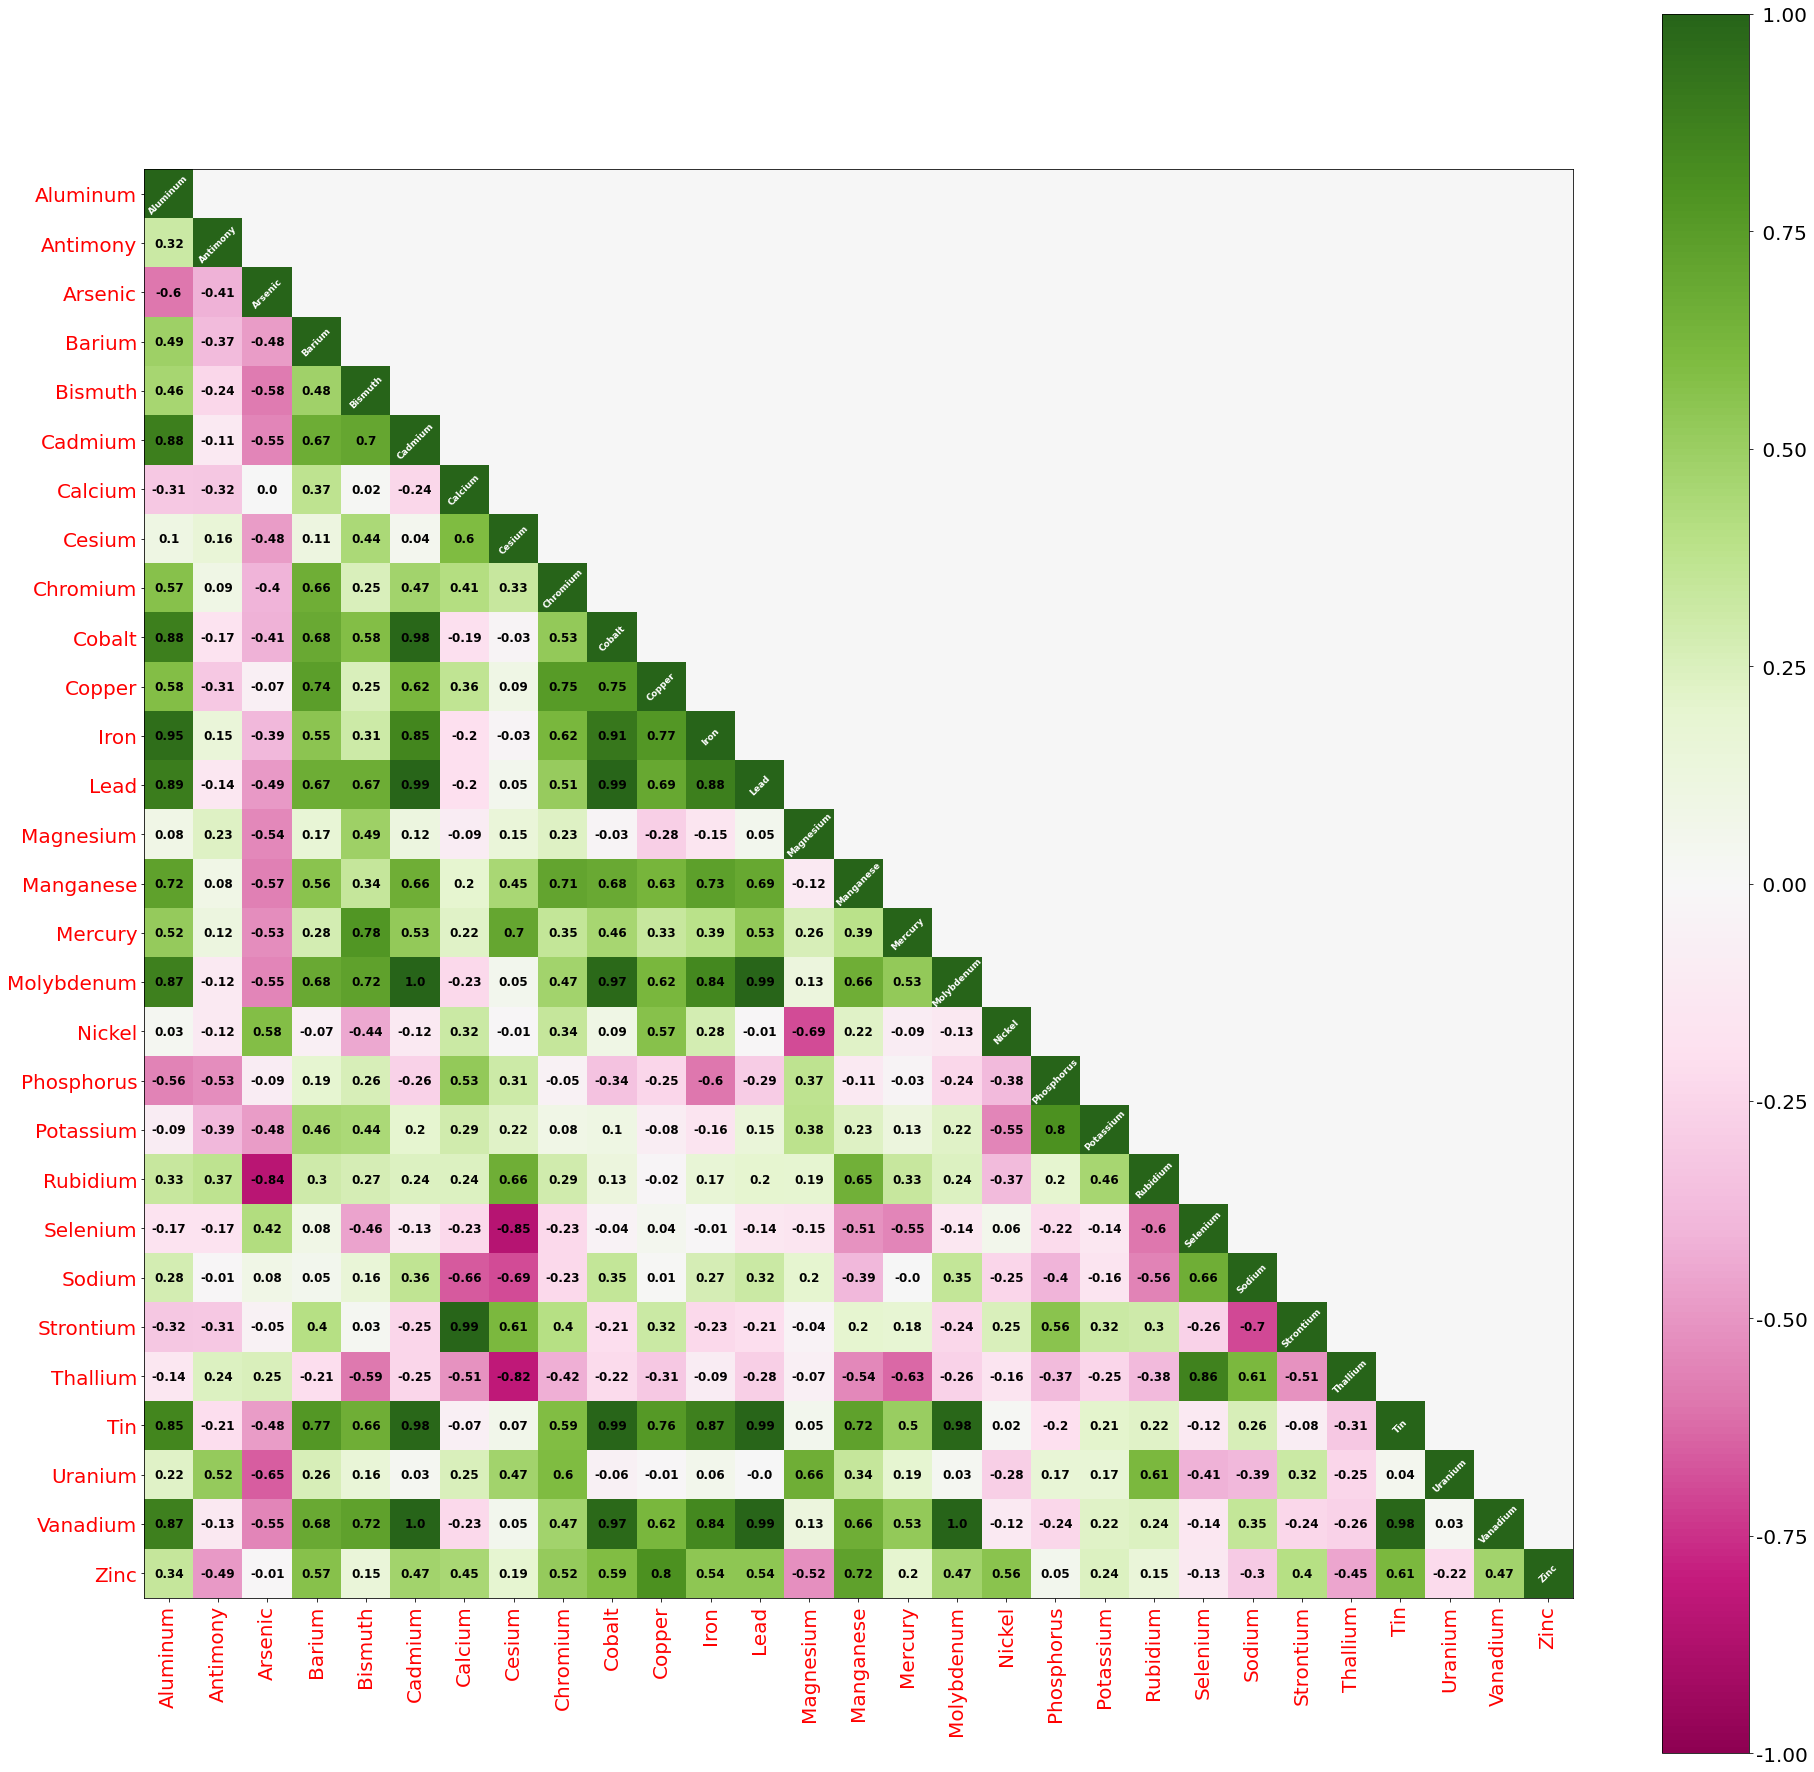

In [21]:
fig, ax = plt.subplots(figsize = (32, 32))
cmap = plt.cm.PiYG
im = ax.imshow(np.tril(corr_matrix_MT, k=0), cmap=cmap)
fig.set_facecolor("white")
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set_ticks(np.arange(corr_matrix_MT.shape[0]), elements, rotation = 90, color = "r", fontsize = 20)
ax.yaxis.set_ticks(np.arange(corr_matrix_MT.shape[0]), elements, color = "r", fontsize = 20)
# ax.set_ylim(2.5, -0.5)
for i in np.arange(corr_matrix_MT.shape[0]):
    ax.text(i, i, elements[i], ha = 'center', va = 'center',
            color = 'white', fontsize = 9, rotation = 45, fontweight = "bold")
    for j in np.arange(i):
        ax.text(j, i, corr_matrix_MT[i, j], ha='center', va='center',
                color='k', fontsize = 12, fontweight = "bold")
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
cbar.ax.tick_params(labelsize=20)
plt.savefig("./pics/pearson mt.png")
plt.show()


### corolation for selected elements
MT first

In [22]:
lt_id = lt_track[:, 3:]
elements = ["Lead", "Cadmium", "Molybdenum", "Mercury", "Selenium", "Copper", "Zinc"]
element_id = np.zeros(data["Analyte"].shape, dtype="bool")
for i in np.arange(element_id.shape[0]):
    if data["Analyte"][i] in elements:
        element_id[i] = True
row_id = np.logical_and(data["Units"].to_numpy() == "mg/kg wwt", ~np.all(lt_id[:, ~Liver_id] == True, axis = 1)) * element_id
corr_matrix_MT = np.corrcoef(data.loc[row_id, x[~Liver_id]].to_numpy("single").T, rowvar=False).round(decimals = 2)
elements = data["Analyte"].loc[row_id].to_numpy()

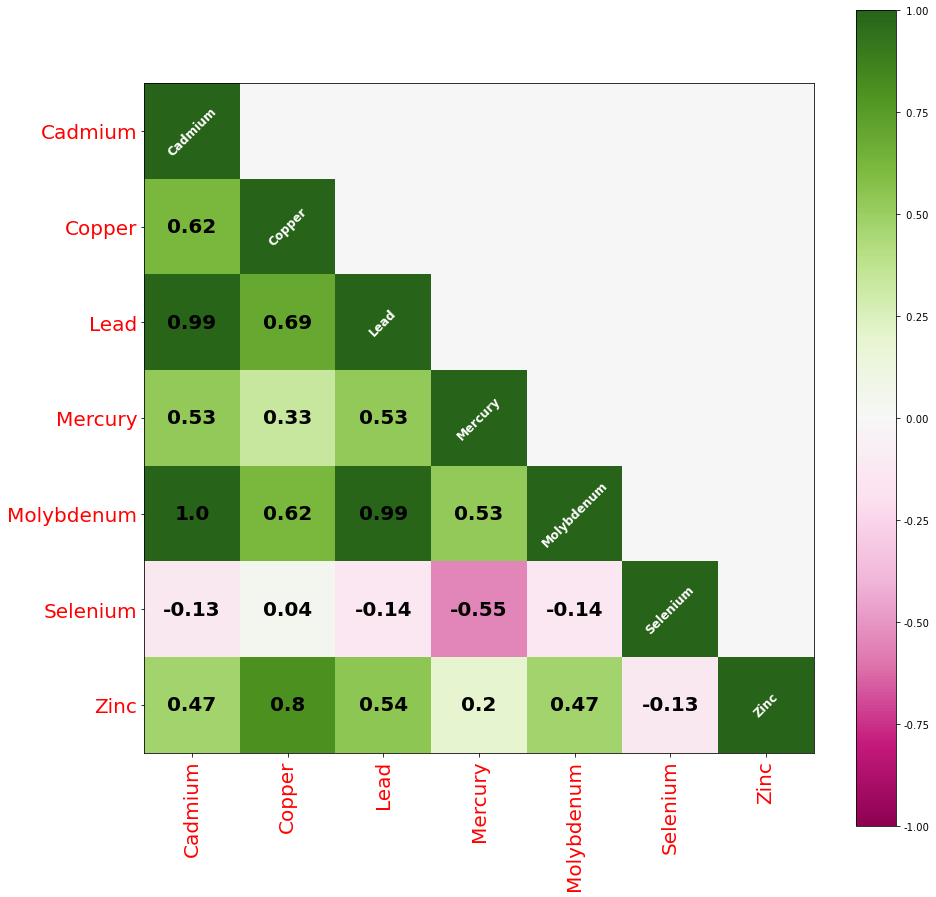

In [23]:
fig, ax = plt.subplots(figsize = (15, 15))
cmap = plt.cm.PiYG
im = ax.imshow(np.tril(corr_matrix_MT, k=0), cmap=cmap)
fig.set_facecolor("white")
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set_ticks(np.arange(corr_matrix_MT.shape[0]), elements, rotation = 90, color = "r", fontsize = 20)
ax.yaxis.set_ticks(np.arange(corr_matrix_MT.shape[0]), elements, color = "r", fontsize = 20)
# ax.set_ylim(2.5, -0.5)
for i in np.arange(corr_matrix_MT.shape[0]):
    ax.text(i, i, elements[i], ha = 'center', va = 'center',
            color = 'white', fontsize = 12, rotation = 45, fontweight = "bold")
    for j in np.arange(i):
        ax.text(j, i, corr_matrix_MT[i, j], ha='center', va='center',
                color='k', fontsize = 20, fontweight = "bold")
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.savefig("./pics/pearson_selected elements_MT.png")
plt.show()


Liver

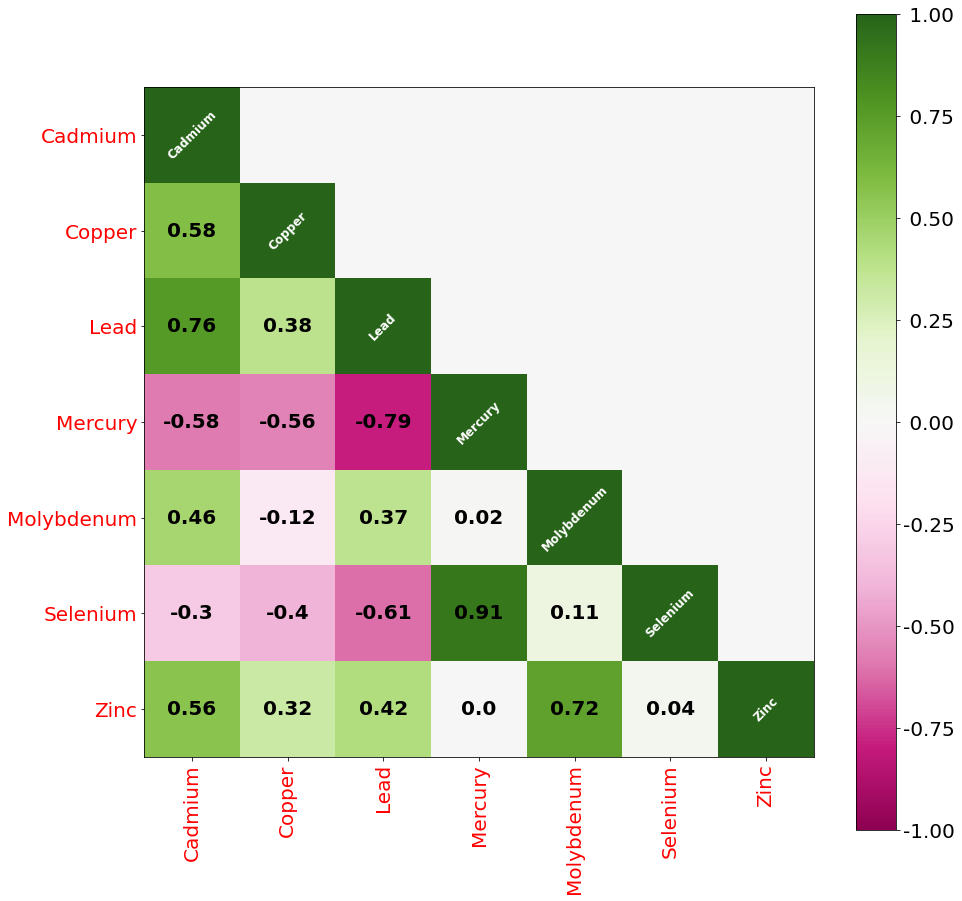

In [24]:
lt_id = lt_track[:, 3:]
elements = ["Lead", "Cadmium", "Molybdenum", "Mercury", "Selenium", "Copper", "Zinc"]
element_id = np.zeros(data["Analyte"].shape, dtype="bool")
for i in np.arange(element_id.shape[0]):
    if data["Analyte"][i] in elements:
        element_id[i] = True
row_id = np.logical_and(data["Units"].to_numpy() == "mg/kg wwt", ~np.all(lt_id[:, Liver_id] == True, axis = 1)) * element_id
corr_matrix_MT = np.corrcoef(data.loc[row_id, x[Liver_id]].to_numpy("single").T, rowvar=False).round(decimals = 2)
elements = data["Analyte"].loc[row_id].to_numpy()

fig, ax = plt.subplots(figsize = (15, 15))
cmap = plt.cm.PiYG
im = ax.imshow(np.tril(corr_matrix_MT, k=0), cmap=cmap)
fig.set_facecolor("white")
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set_ticks(np.arange(corr_matrix_MT.shape[0]), elements, rotation = 90, color = "r", fontsize = 20)
ax.yaxis.set_ticks(np.arange(corr_matrix_MT.shape[0]), elements, color = "r", fontsize = 20)
# ax.set_ylim(2.5, -0.5)
for i in np.arange(corr_matrix_MT.shape[0]):
    ax.text(i, i, elements[i], ha = 'center', va = 'center',
            color = 'white', fontsize = 12, rotation = 45, fontweight = "bold")
    for j in np.arange(i):
        ax.text(j, i, corr_matrix_MT[i, j], ha='center', va='center',
                color='k', fontsize = 20, fontweight = "bold")
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
cbar.ax.tick_params(labelsize=20)
plt.savefig("./pics/pearson_selected elements_Liver.png")
plt.show()

# One way Anova

In [25]:
from scipy.stats import f_oneway

anova_dict = {}
# elements = ["Aluminum", "Zinc", "Mercury"]
elements = data["Analyte"][1::2].to_list()
for element in elements:
    result = f_oneway(data.loc[np.logical_and(data["Analyte"] == element, data["Units"] == "mg/kg wwt"),
                                liver_columns].to_numpy("double").ravel(), 
                                data.loc[np.logical_and(data["Analyte"] == element, data["Units"] == "mg/kg wwt"), 
                                         mt_columns].to_numpy("double").ravel())
    anova_dict.update({element: [*result]})

anova_table = pd.DataFrame(np.c_[np.array(list(anova_dict.keys()), dtype="str")[:, np.newaxis],
                                  data.loc[data["Units"] == "mg/kg wwt",
                                            [*liver_columns, *mt_columns]].to_numpy("single"),
                                              np.array(list(anova_dict.values()))],
                                                columns=["analyte", *[*liver_columns, *mt_columns],
                                                          "statistic", "p-value"])

/Users/amir/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/amir/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/amir/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/amir/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


## making excel for statistics
 dups, shapiro, pearson -> stats.xlsx

In [26]:
with pd.ExcelWriter('stats.xlsx') as writer:
    dups.to_excel(writer, sheet_name="dups")
    shapiro_table.to_excel(writer, sheet_name="shapiro")
    pearson_liver_mt_table.to_excel(writer, sheet_name="pearson liver-mt")
    anova_table.to_excel(writer, sheet_name= "One Way Anova")

# Reading Punch Data

In [27]:
punch_data = pd.read_excel("2303384 FINAL BAL Standard EDD 18 May 23 1649.xls")

temp = punch_data["Sample_Tag"].str.split("- ")
tag = []
tissue = []
for i in np.arange(temp.shape[0]):
    if len(temp[i]) > 1:
        tag.append(temp[i][0].strip())
        tissue.append(temp[i][1].strip())
    else:
        tag.append((temp[i][0]).strip())
        tissue.append("None")

punch_data.insert(4, "Tag", tag)
punch_data.insert(4, "Tissue", tissue)
punch_data.drop(columns="Sample_Tag")

# reading [fish_number - tag] from sheet excel sheet names
temp_file = xl.reader.excel.load_workbook("2022 Nechako river WSG Mortality Summary.xlsx")
tags = temp_file.sheetnames
tags = np.char.split(tags, "-")
fish_number = []
fish_tag = []
for tag in tags:
    fish_number.append(tag[0].strip())
    fish_tag.append(tag[1].strip())
tag_list = np.array(np.c_[fish_number, fish_tag])

# maping tags to fish_numbers
temp = punch_data['Tag'].copy().to_numpy()
for i in np.arange(tag_list.shape[0]):
    temp[punch_data['Tag'] == tag_list[i, 1]] = tag_list[i, 0]

# replacing the results with Sample_Tag column :)
punch_data["Sample_Tag"] = temp

punch_data = punch_data.loc[(punch_data["Tissue"] == "Liver") | (punch_data["Tissue"] == "Muscle")]
# print(punch_data.columns)
punch_data = punch_data.loc[:, punch_data.columns[[4, 5, 6, 11, 12, 14, 15, 28]]]

element_ref = np.c_[np.unique(data["Analyte"].to_numpy()[1:]), ["Al", "An", "As", "Ba", "Be", "Bi", "B", "Cd", "Ca", "Ce", "Cr", "Co", "Cu", "Fn", "Pb", "Li", "Mg", "Mn", "Hg", "Mo", "Ni", "P", "K", "Ru", "Se", "Na", "St", "Te", "Ta", "Tin", "Ur", "Va", "Zn", "Zi"]]

elements = [element_ref[i==element_ref[:, 1], 0].item() for i in punch_data["Analyte"]]
punch_data["Analyte"] = elements

punch_data.replace("Muscle", "MT", inplace=True)
punch_data.reset_index(inplace=True)

ours = punch_data["Result"].to_numpy("single").copy()
for i in np.arange(ours.shape[0]):
    temp = data.loc[(data["Analyte"] == punch_data["Analyte"][i]) & (data["Units"] == "mg/kg wwt"), data.columns.str.contains(punch_data["Tissue"][i]) & data.columns.str.contains(punch_data["Sample_Tag"][i])].to_numpy("single")
    if temp.shape[1] == 0:
        ours[i] = None
    else:
        ours[i] = temp.item(0)

punch_data.insert(5, column="Ours", value=ours)

## Ploting punch data vs Ours

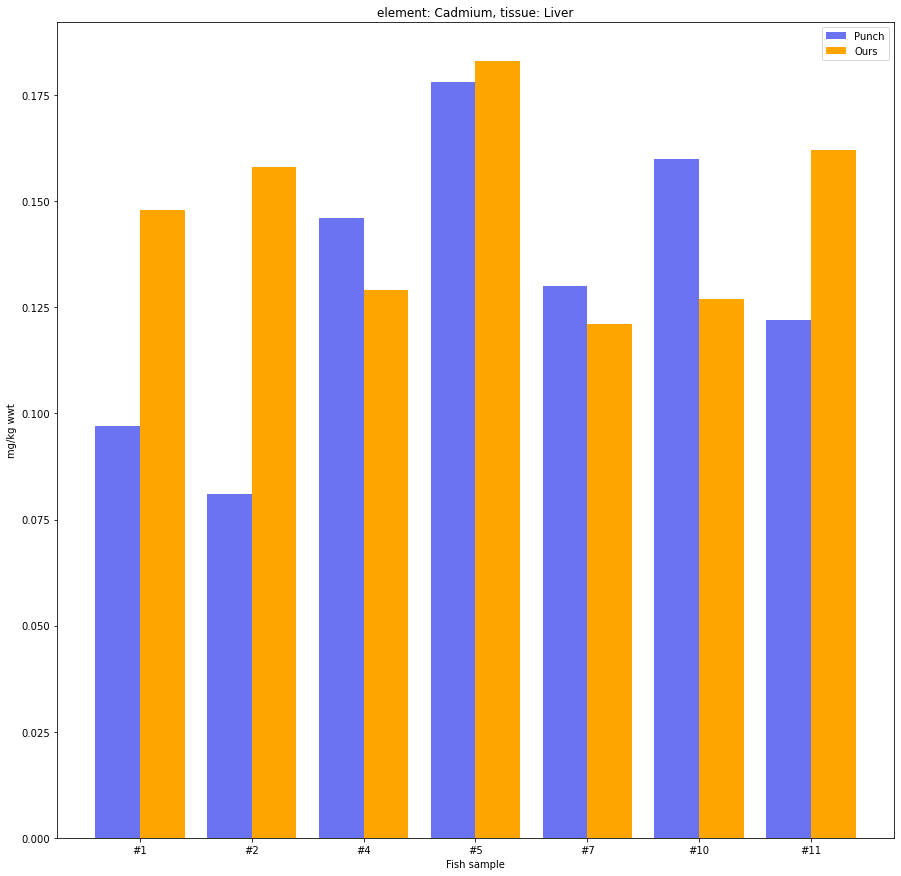

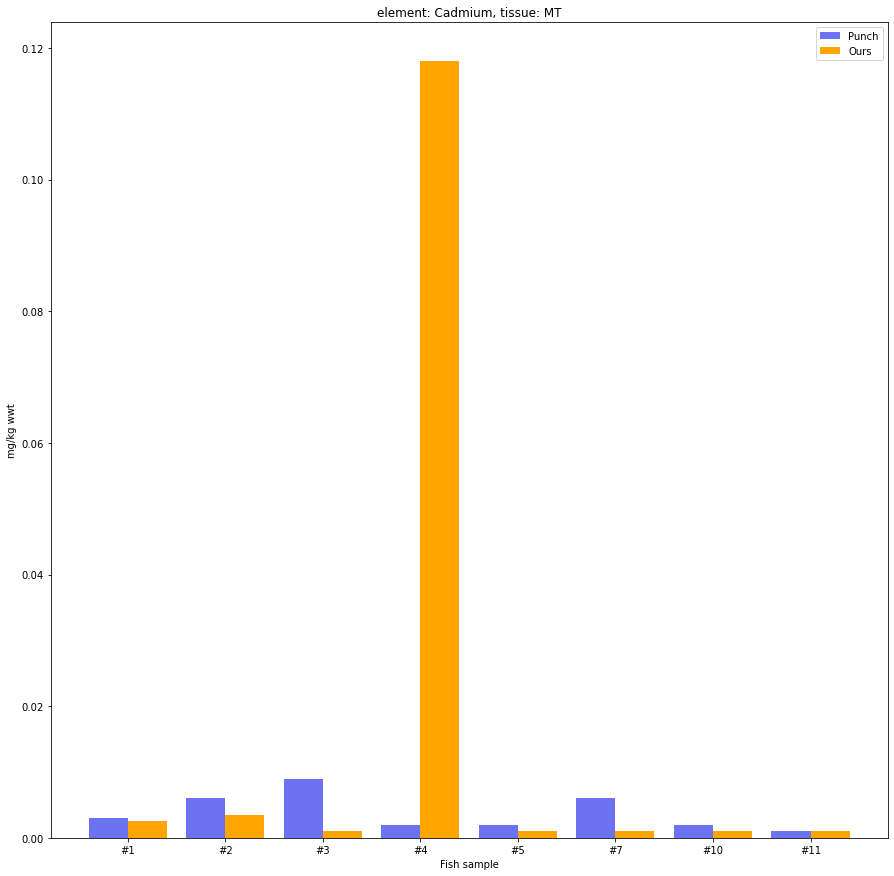

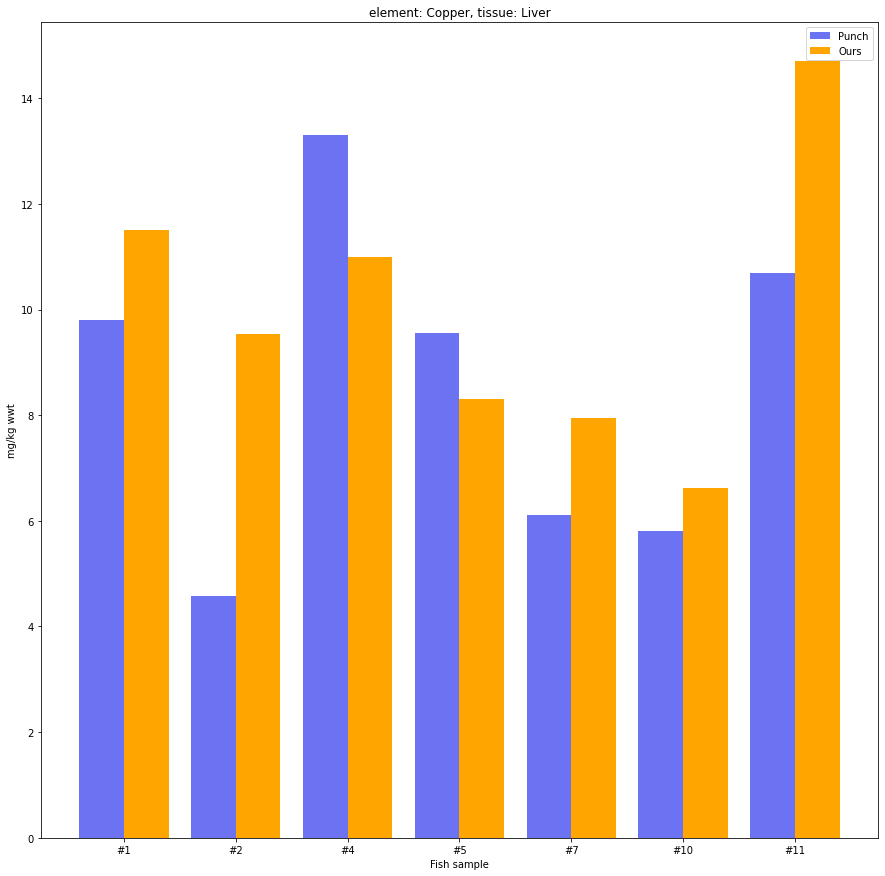

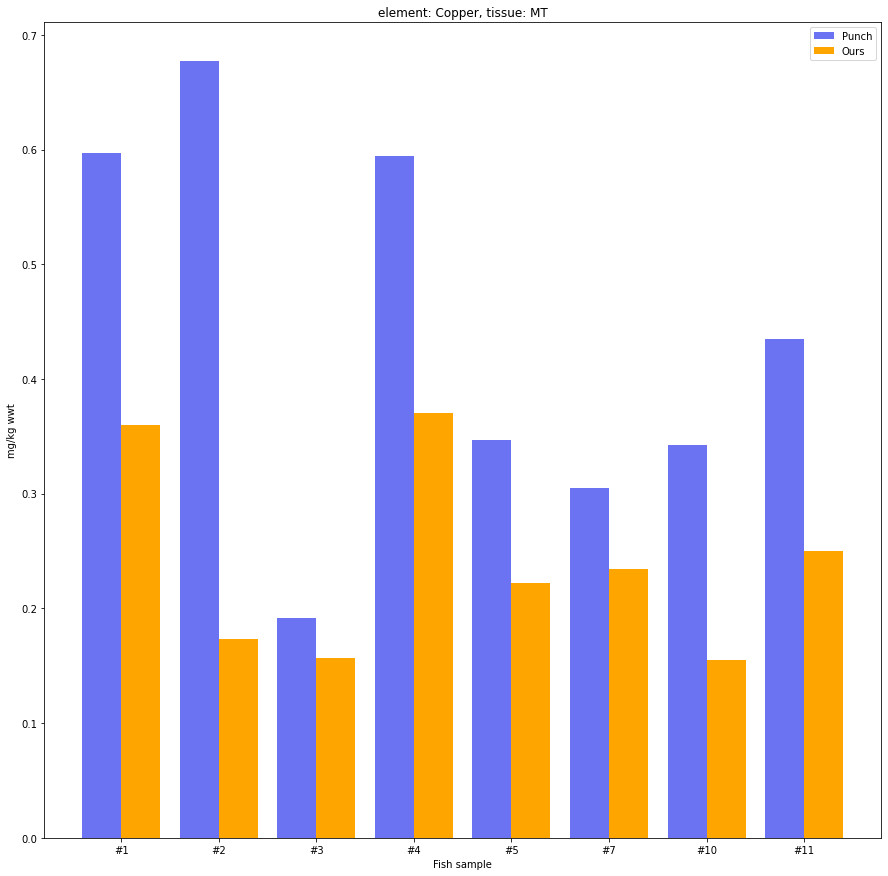

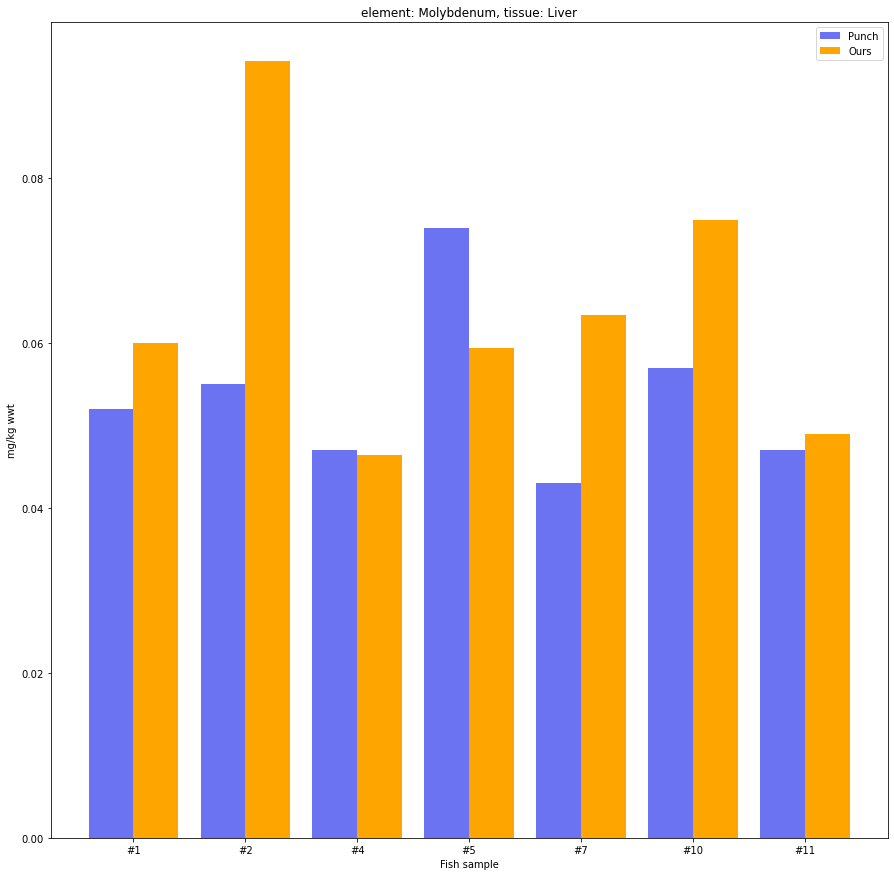

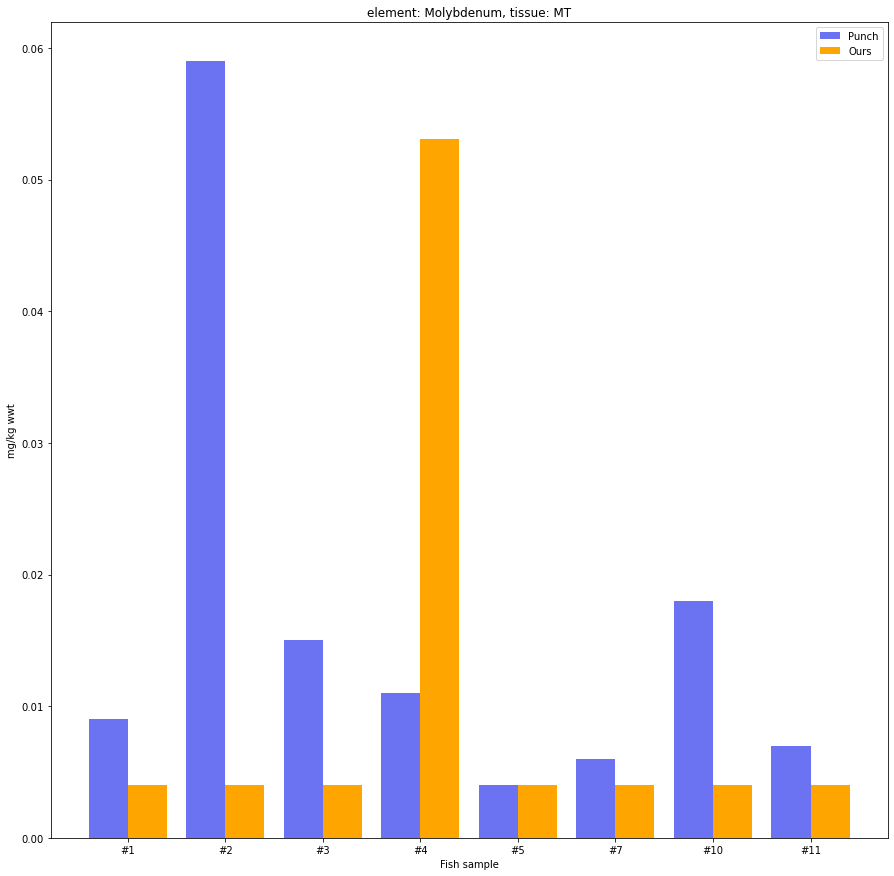

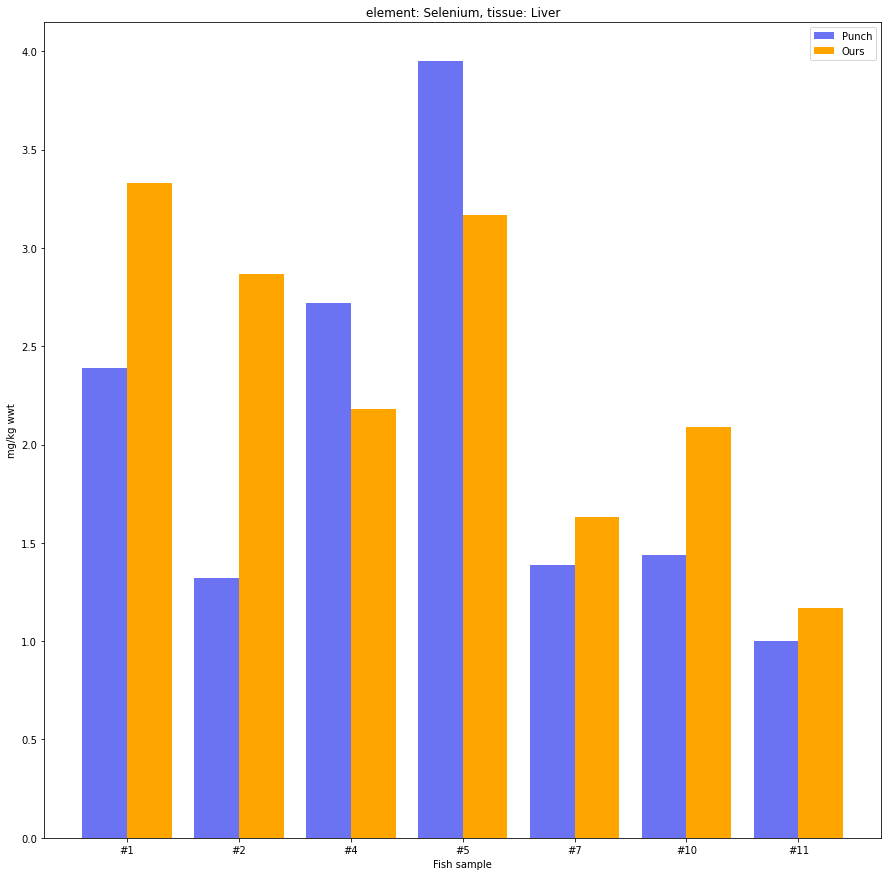

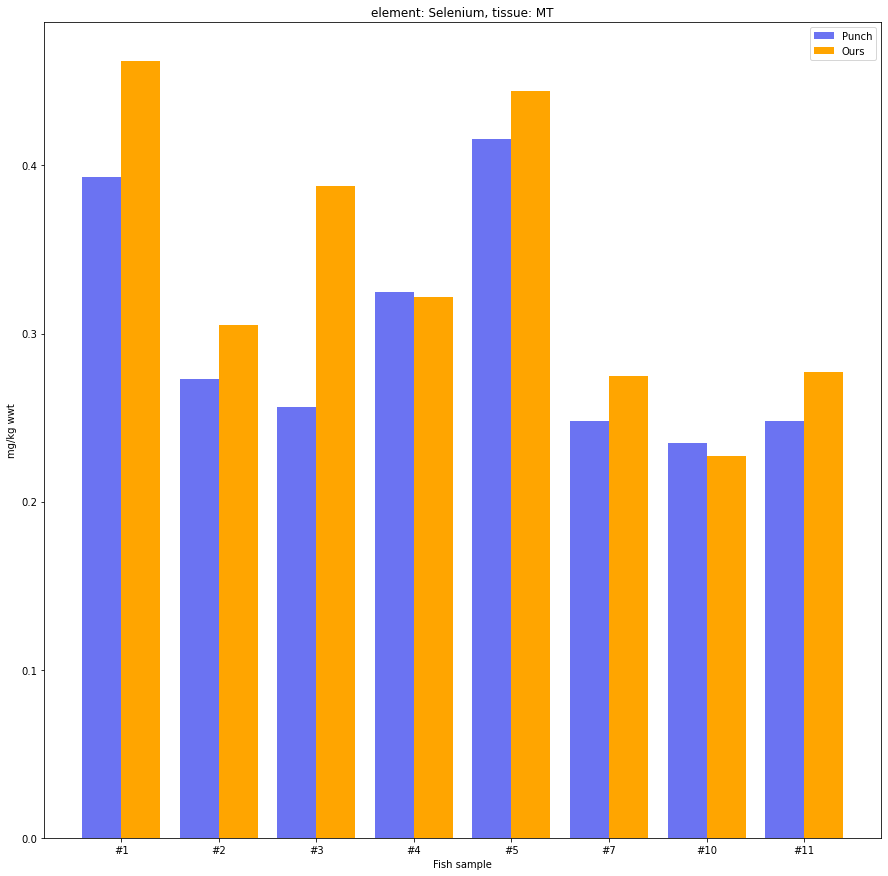

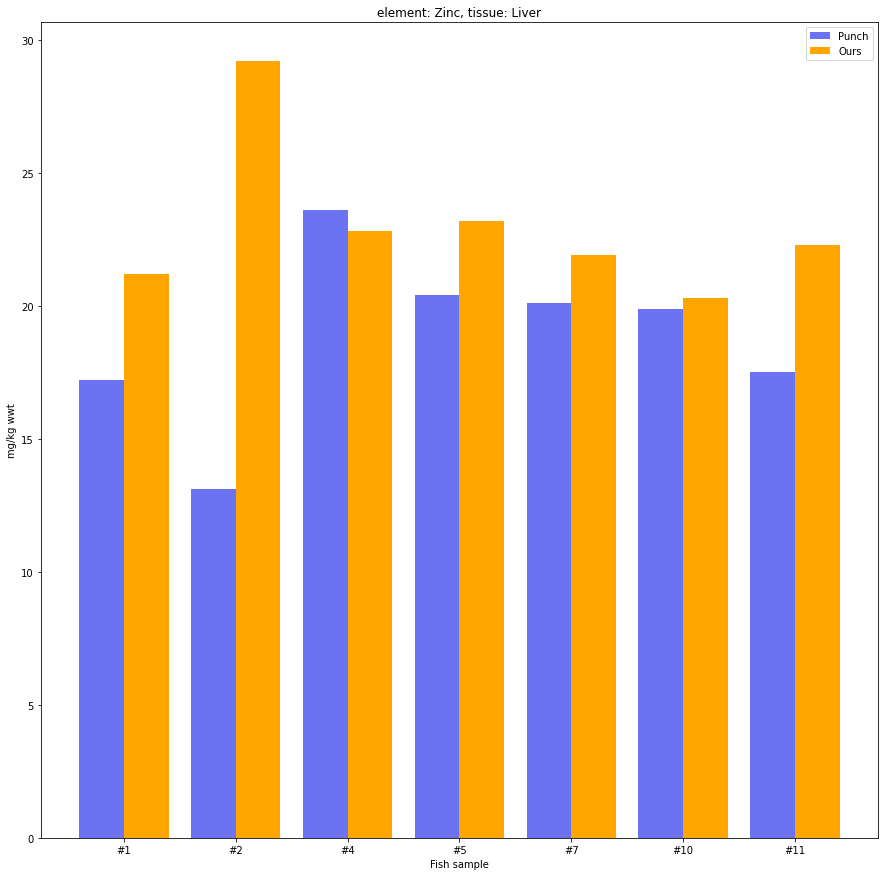

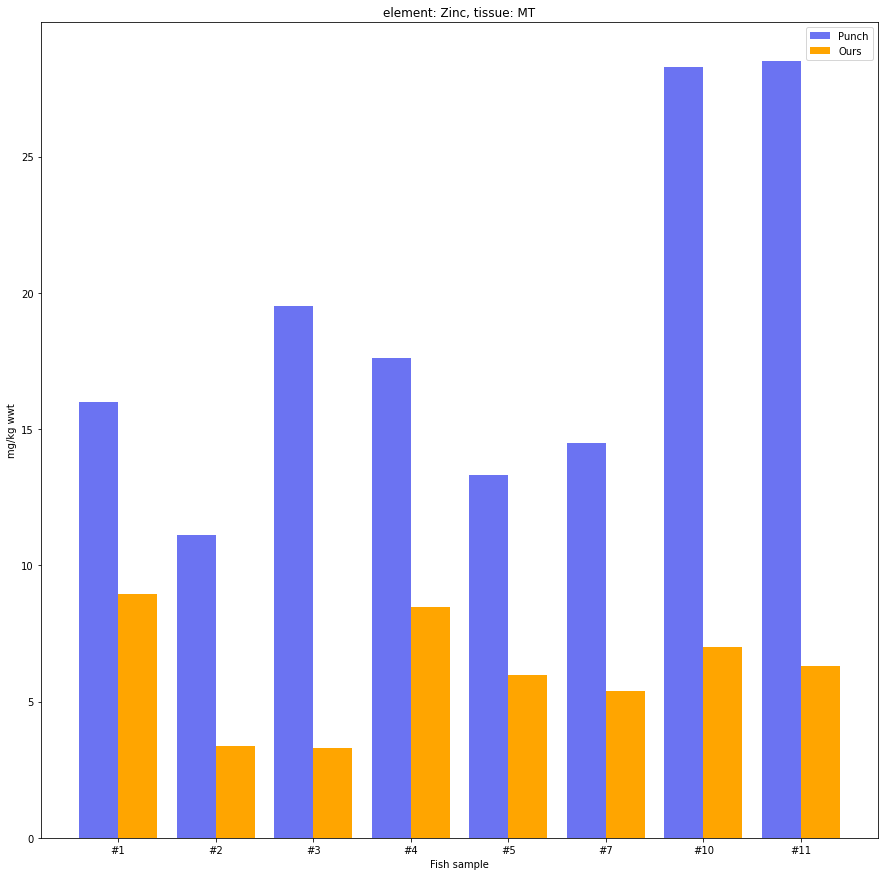

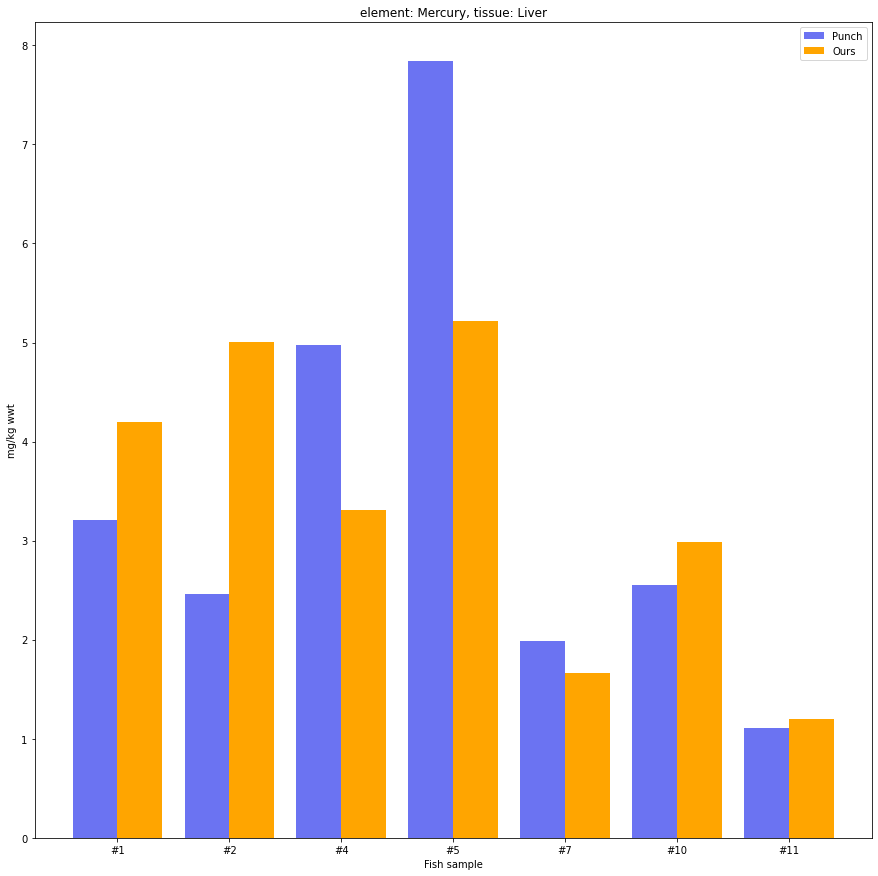

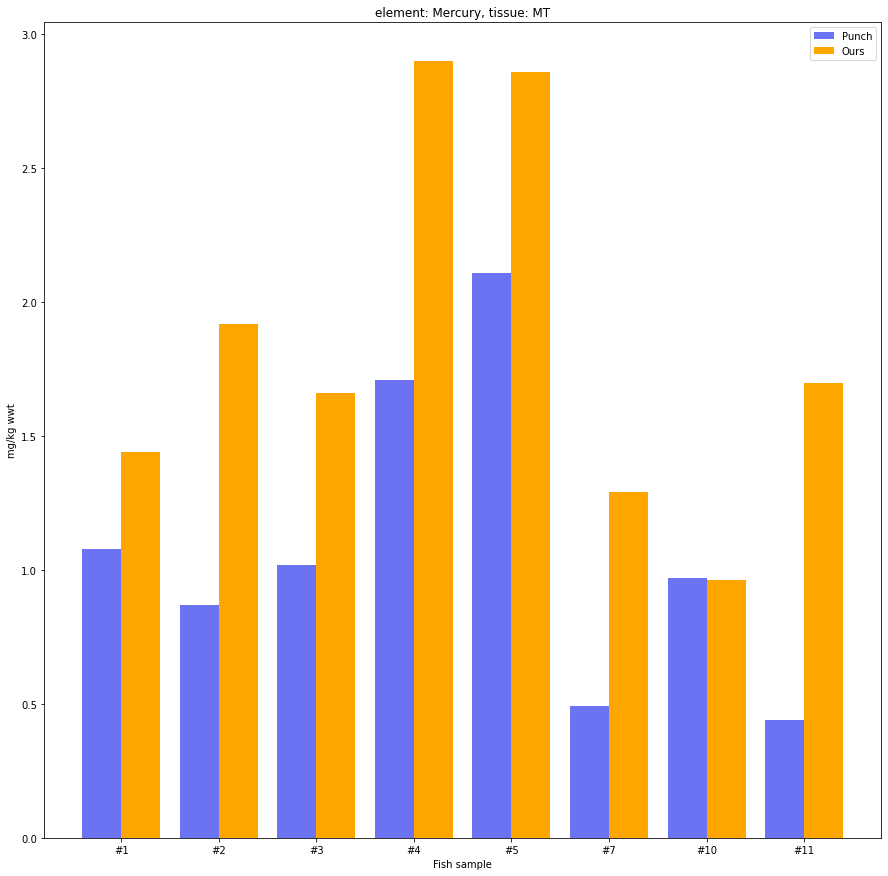

In [28]:
elements = punch_data["Analyte"].unique()
# elements = ["Zinc"]
tissues = punch_data["Tissue"].unique()
for element in elements:
    for tissue in tissues:
        fig, ax = plt.subplots(figsize = (15, 15))
        fig.set_facecolor("white")
        temp = punch_data[["Sample_Tag", "Result", "Ours"]].loc[(punch_data["Tissue"] == tissue) & (punch_data["Analyte"] == element) & (punch_data["Matrix"] == "Fish")].dropna()
        temp = temp.reindex(temp["Sample_Tag"].str.removeprefix("#").astype("int").sort_values().index)
        x = np.arange(temp["Sample_Tag"].shape[0])
        ax.bar(x, temp["Result"].to_numpy("single").T, width = 0.4, label = "Punch", color = [.42, .45, .95])
        ax.bar(x+.4, temp["Ours"].to_numpy("single").T, width = 0.4, label = "Ours", color = "orange")
        ax.set_xticks(x+0.2, temp["Sample_Tag"])
        ax.set_title(f"element: {element}, tissue: {tissue}")
        ax.set_xlabel("Fish sample")
        ax.set_ylabel("mg/kg wwt")
        ax.legend()
        if not os.path.exists("./pics/punch_ours/"):
            os.makedirs("./pics/punch_ours/")
        fig.savefig(f"./pics/punch_ours/{element}_{tissue}.png")